In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.shape

(284807, 31)

In [4]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
from sklearn.preprocessing import StandardScaler
data['normalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)
data = data.drop(['Time'],axis=1)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [6]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=0)

In [8]:
# Importing the Keras libraries and packages
from keras.layers import Dense
# Initialising the ANN
model = Sequential()
# Adding the input layer and the first hidden layer
model.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 29))
# Adding the second hidden layer
model.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu'))
# Adding the output layer
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [9]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
# Fitting the ANN to the Training set
model.fit(X_train, y_train, batch_size = 32, epochs = 10)

Epoch 1/10
199364/199364 [==============================] - 16s 81us/step - loss: 0.0143 - accuracy: 0.9984
Epoch 2/10
199364/199364 [==============================] - 13s 63us/step - loss: 0.0032 - accuracy: 0.9994
Epoch 3/10
199364/199364 [==============================] - 13s 66us/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/10
199364/199364 [==============================] - 14s 68us/step - loss: 0.0027 - accuracy: 0.9994
Epoch 5/10
199364/199364 [==============================] - 13s 65us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 6/10
199364/199364 [==============================] - 13s 64us/step - loss: 0.0026 - accuracy: 0.9994
Epoch 7/10
199364/199364 [==============================] - 12s 62us/step - loss: 0.0025 - accuracy: 0.9994
Epoch 8/10
199364/199364 [==============================] - 13s 67us/step - loss: 0.0024 - accuracy: 0.9994
Epoch 9/10
199364/199364 [==============================] - 13s 63us/step - loss: 0.0024 - accuracy: 0.9995
Epoch 10/10
199364/199364 [=

In [10]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
score = model.evaluate(X_test, y_test)
score

85443/85443 [==============================] - 3s 33us/step


[0.0033346806097723034, 0.9994499087333679]

In [11]:
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [12]:
from sklearn.metrics import accuracy_score
print("Test Data Accuracy:",accuracy_score(y_test, y_pred)*100)

Test Data Accuracy: 99.94499256814484


<AxesSubplot:>

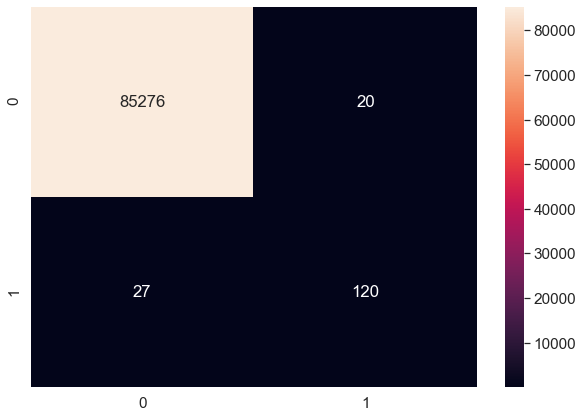

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')

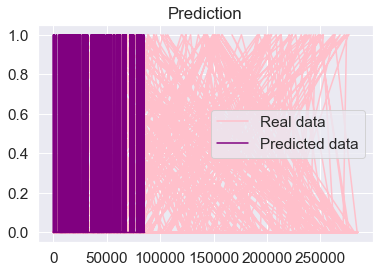

In [14]:
plt.plot(y_test, color = 'pink', label = 'Real data')
plt.plot(y_pred, color = 'purple', label = 'Predicted data')
plt.title('Prediction')
plt.legend()
plt.show()

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.82      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443



In [16]:
from sklearn.tree import DecisionTreeClassifier
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred = decision_tree_model.predict(X_test)

In [20]:
print("Test Data Accuracy:",accuracy_score(y_test, y_pred)*100)

Test Data Accuracy: 99.93211848834895


<AxesSubplot:>

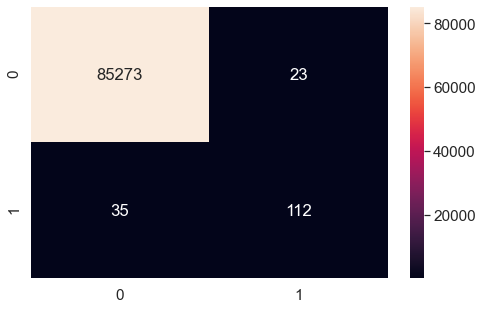

In [22]:
cm = confusion_matrix(y_test, y_pred) 
df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (8,5))
sns.set(font_scale=1.4)
sns.heatmap(df_cm, annot=True, fmt='g')